# Describing Bitcoin

Bitcoin was the first ever decentralized cryptocurrency. It utilizes Blockchain, a distributed ledger, to ensure the accuracy and transparency of exchanges. Although it had been around for nearly a decade, it was around 2017 that Bitcoin really caught world-wide attention and we saw the prices peak. This project will describe and visualize the story behind the rise of Bitcoin and its Network, and also examine its current state.

## Set Up Files & Packages

In [1]:
# import packages

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import csv
import xlrd
import os

%matplotlib inline
init_notebook_mode(connected=True)  #allow visualization in notebook

In [2]:
folder = "C:/Users/Stefan/Documents/Data_Bootcamp/Final_Draft/"

# Bitcoin Sentiment Imports
BTrend = pd.read_csv(folder+'BitcoinInterestGTrends.csv')
BFactiva = pd.read_csv(folder+'BitcoinFactivaArticleCount.csv')

# Bitcoin Price Imports
BTC_Data_Coinbase = pd.read_csv(folder+'Coinbase_BTCUSD.csv')
BTC_Data_Kraken = pd.read_csv(folder+'Kraken_BTCUSD.csv')
BTC_Bitstamp_Data = pd.read_csv(folder+'Bitstamp_BTCUSD.csv')
BTC_Bitfinex_Data = pd.read_csv(folder+'Bitfinex_BTCUSD.csv')

# Bitcoin Blockchain Imports
hash_rate = pd.read_csv(folder+'BitcoinHashRate.csv')
difficulty = pd.read_csv(folder+'BitcoinDifficulty.csv')
fees_per_day = pd.read_csv(folder+'BitcoinFeesPerDay.csv')
transaction_per_day = pd.read_csv(folder+'BitcoinTransactionPerDay.csv')
block_reward_per_day = pd.read_csv(folder+'BitcoinBlockRewardPerDay.csv')
bitcoin_chain_size = pd.read_csv(folder+'BitcoinChainSize.csv')
bitcoin_node = pd.read_csv(folder+'BitcoinNodes-20181219.csv')
countryCodes = pd.read_csv(folder+'country-codes.csv')

In [3]:
# Definitions to convert date time series
def dateifier(date):
    v = list(map(int, date.split('/')))
    return datetime.date(v[2], v[0], v[1])


# Function to reformat time
def reformatTime(dataSet):
    dataSet['DateTime'] = dataSet['DateTime'].apply(lambda x: x.split()[0])
    dataSet['DateTime'] = dataSet['DateTime'].apply(
        lambda x: x.split('-')).apply(
            lambda x: datetime.date(int(x[0]), int(x[1]), int(x[2])))

## Bitcoin Sentiment

At the end of 2017, there was an incredible amount of craze over Bitcoin and seemingly everyone was talking about how cryptocurrencies will takeover fiat currencies because the security and transparency of Blockchain. It was also around this time that Bitcoin hit its peak prices. News and media was filled with analysts predicting Bitcoin prices to hit $30,000, while others were  calling it a bubble and claiming it will crash soon. To understand exactly how much people were talking about Bitcoin, we took data from Google Trends to understand the buzz around Bitcoin, and examined the number of articles published on Bitcoin from 2016 - today through Factiva.

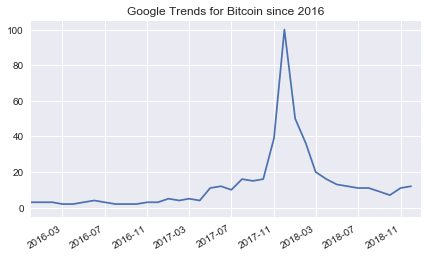

In [4]:
plt.style.use('seaborn')

# Setting the Index
BTrend['Month'] = pd.to_datetime(BTrend['Month'])
BTrend.set_index('Month', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(7, 4))

x = BTrend.index
y = BTrend['Interest']

fig.autofmt_xdate()
ax.set_xlim([datetime.date(2015, 12, 1), datetime.date(2018, 12, 31)])
ax.set_title("Google Trends for Bitcoin since 2016")
ax.plot(x, y)

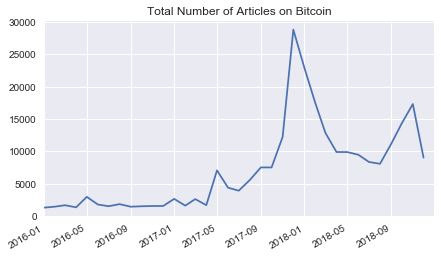

In [5]:
# Setting Index and Cleaning
BFactiva['Date'] = pd.to_datetime(BFactiva['Date'])
BFactiva.set_index('Date', inplace=True)
BFactiva = BFactiva.dropna(thresh=1)

# Plot
fig, ax = plt.subplots(figsize=(7, 4))

x = BFactiva.index
y = BFactiva['Article Count']

fig.autofmt_xdate()
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2018, 12, 31)])
ax.set_title("Total Number of Articles on Bitcoin")
ax.plot(x, y)

From the Google Trends interest in the search term "Bitcoin" and the total number of articles published on Bitcoin from 2016, we definitely see there was a rise in interest starting around May of 2017. At this point we'd like to dive further into understanding the general sentiment on Bitcoin from this time, and have pulled the number of articles that displayed sentiment (both positive and negative) from Factiva.

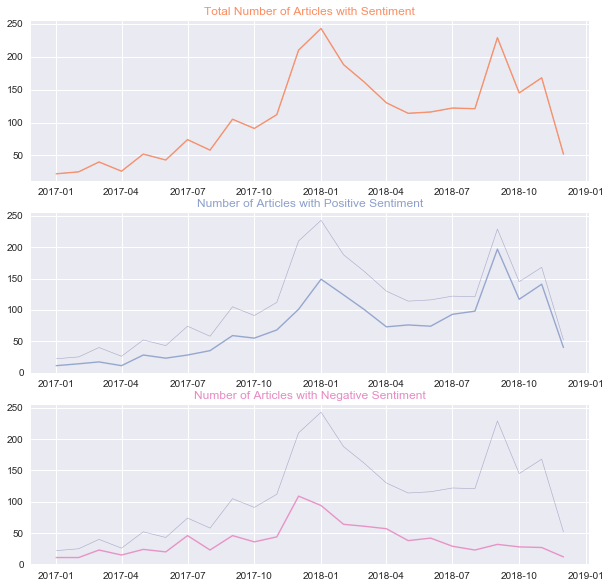

In [6]:
# Making Data Frame
df = pd.DataFrame({
    'x':
    BFactiva.index, 'Total Number of Articles with Sentiment': (BFactiva['Positive'] + BFactiva['Negative']),
    'Number of Articles with Positive Sentiment': BFactiva['Positive'],
    'Number of Articles with Negative Sentiment': BFactiva['Negative']
})

# Create a color palette
palette = plt.get_cmap('Set2')

# Configure Figuresize
fig = plt.figure(figsize=(10, 10))

# Multiple line plot
num = 0
for column in df.drop('x', axis=1):
    num += 1

    plt.subplot(3, 1, num)

    # Plot Total
    plt.plot(df['x'], df['Total Number of Articles with Sentiment'],
             color='midnightblue', linewidth=0.6, alpha=0.3)

    # Plot the lineplot
    plt.plot( df['x'], df[column], marker='', color=palette(num), linewidth=1.4, alpha=0.9, label=column)

    # Add title
    plt.title(column, loc='center', fontsize=12, fontweight=0, color=palette(num))

Indeed, we see that around May of 2017 we see a rising trend of positive articles. We also see that there was a similar amount of positive and negative sentiment around this time, but soon the overall sentiment has become overwhelmingly positive, especially leading up to today. In fact, considering that the price of Bitcoin is driven by supply and demand, this strong media presence and positive sentiment likely contributed to the rising price of Bitcoin. Next, we would like to analyze the prices of Bitcoin.

## Bitcoin Price & Volatility 

In order to more accurately analyze trends in the price data, we decided to look at Bitcoin's average price across the four largest exchanges the currency is traded on. These exchanges are Coinbase, Kraken, Bitstamp, and Bitfinex. We then looked at graphs of Bitcoin's price, as well as the daily percentage changes in that price.

In [7]:
# Coinbase
BTC_Coinbase = pd.DataFrame(BTC_Data_Coinbase)
BTC_Coinbase['Date'] = BTC_Coinbase['Date'].map(dateifier)
BTC_Coinbase.set_index(['Date'], inplace=True)

BTC_Coinbase['%Change'] = (
    BTC_Coinbase['Close'] - BTC_Coinbase['Open']) / BTC_Coinbase['Open']

# Kraken
BTC_Kraken = pd.DataFrame(BTC_Data_Kraken)
BTC_Kraken['Date'] = BTC_Kraken['Date'].map(dateifier)
BTC_Kraken.set_index(['Date'], inplace=True)

BTC_Kraken_Diff = BTC_Kraken['Close'] - BTC_Kraken['Open']
BTC_Kraken_Change = BTC_Kraken_Diff / BTC_Kraken['Open']
BTC_Kraken['%Change'] = BTC_Kraken_Change

# Bitstamp

BTC_Bitstamp = pd.DataFrame(BTC_Bitstamp_Data)
BTC_Bitstamp['Date'] = BTC_Bitstamp['Date'].map(dateifier)
BTC_Bitstamp.set_index(['Date'], inplace=True)

BTC_Bitstamp_Diff = BTC_Bitstamp['Close'] - BTC_Bitstamp['Open']
BTC_Bitstamp_Change = BTC_Bitstamp_Diff / BTC_Bitstamp['Open']
BTC_Bitstamp['%Change'] = BTC_Bitstamp_Change

# Bitfinex
BTC_Bitfinex = pd.DataFrame(BTC_Bitfinex_Data)
BTC_Bitfinex['Date'] = BTC_Bitfinex['Date'].map(dateifier)
BTC_Bitfinex.set_index(['Date'], inplace=True)

BTC_Bitfinex_Diff = BTC_Bitfinex['Close'] - BTC_Bitfinex['Open']
BTC_Bitfinex_Change = BTC_Bitfinex_Diff / BTC_Bitfinex['Open']
BTC_Bitfinex['%Change'] = BTC_Bitfinex_Change

### Average Bitcoin Price

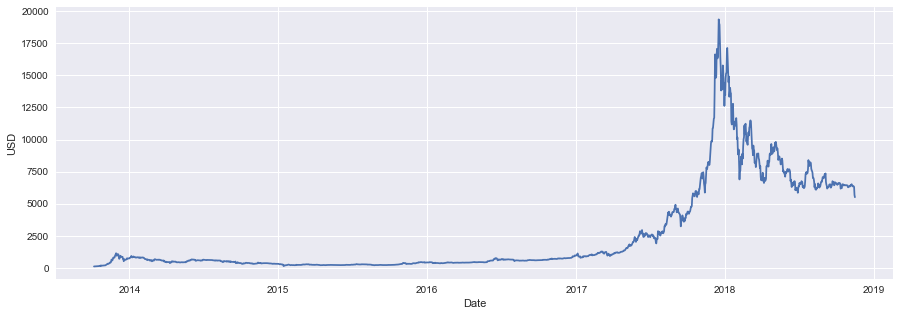

In [8]:
BTC_Price = pd.DataFrame()

BTC_Price['Kraken'] = BTC_Kraken['Close']
BTC_Price['Coinbase'] = BTC_Coinbase['Close']
BTC_Price['Bitstamp'] = BTC_Bitstamp['Close']
BTC_Price['Bitfinex'] = BTC_Bitfinex['Close']

BTC_Average_Price = BTC_Price.mean(axis=1)

BTC_Average_Price.plot(figsize=(15, 5)).set_ylabel('USD')

plt.show()

In [9]:
BTC_Price['Average'] = BTC_Price.mean(axis=1)

In [10]:
# Bitcoin Price Peak
BTC_Average_Price[BTC_Average_Price == BTC_Average_Price.max()]

Date
2017-12-16    19351.17
dtype: float64

Our analysis seems to show a positive relationship between Bitcoin's price and sentiment. This can be seen clearly by the relatively stable prices between 2014 and 2017. Both sentiment and Bitcoin's price both began to rise precipitously midway through 2017, culminating in Bitcoin's peak price on December 16th, 2017.

### Average BTC Price Change

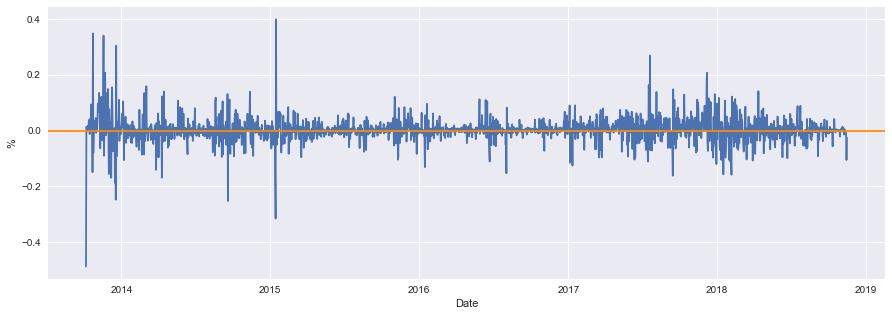

In [11]:
BTC_Changes = pd.DataFrame()

BTC_Changes['Kraken'] = BTC_Kraken['%Change']
BTC_Changes['Coinbase'] = BTC_Coinbase['%Change']
BTC_Changes['Bitstamp'] = BTC_Bitstamp['%Change']
BTC_Changes['Bitfinex'] = BTC_Bitstamp['%Change']

BTC_Average_Change = BTC_Changes.mean(axis=1)

BTC_Average_Change.plot(figsize=(15, 5)).set_ylabel('%')

plt.axhline(0, color='darkorange')

plt.show()

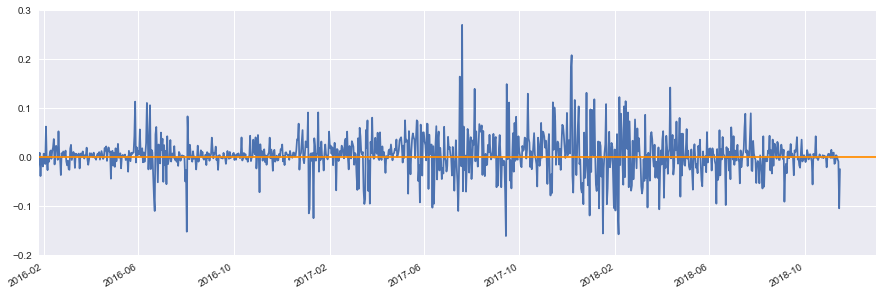

In [12]:
previous_two_years = pd.DataFrame(BTC_Average_Change)
previous_two_years['Date'] = pd.to_datetime(previous_two_years.index)
previous_two_years['Average'] = BTC_Average_Change
previous_two_years.set_index('Date', inplace=True)

previous_two_years.drop(0, axis=1)

fig, ax = plt.subplots(figsize=(15, 5))

x = previous_two_years.index
y = previous_two_years['Average']

fig.autofmt_xdate()
ax.set_xlim([datetime.date(2016, 1, 26), datetime.date(2018, 12, 31)])
ax.set_ylim(-0.2, 0.3)
ax.plot(x, y)

plt.axhline(0, color='darkorange')

plt.show()

Our analysis of price volatility yielded similar results. Bitcoin experienced relatively low volatility between 2015 and 2017, at which point there is a large demarcation from the previous trend. This spike in volatility can be seen clearly in the graph immediately above and coincides almost identically with the sharp increase in impressions that occured during this period.

The volality of Bitcoin's price at this point seems to bring many skepticisms true about whether Bitcoin can be a sound alternative for fiat currency as it was initially intended to. The fall and abruptive rise in price can have various impacts. But due to the limited amount of work we can do, our group has decided to focus specifically on the Bitcoin network alone as it is the underlying bed for Bitcoin to operate.

## The Bitcoin Network

Within the Bitcoin network, there are three main participants. These include the miners, the full nodes and the users. Out of the three, the miners and the full nodes are the most important participants as they are the ones who maintain and keep the network alive. However, they are often conflated with each other since they sometimes share the same responsbility of maintaining the bitcoin's data records of transactions on the blockchain, which is mostly the work of the nodes. Unfortunately at the moment, due to the limited scope of the course and the relatively small data sets there exist on the public internet, we were unable to gather data on a historical timeline for the Bitcoin's miners and nodes. But with basic tools and instructions, we have been able gather data on the current numbers of nodes and their distributions over the world. 

### Bitcoin Nodes

In [13]:
bitcoin_node.rename(columns={'Country code.1': "Country"}, inplace=True)
bitcoin_country_node = pd.DataFrame(bitcoin_node[['Country code', 'Country']])

# create a new default column
bitcoin_country_node['Number of Nodes'] = 0

# counting the number of nodes in each country
for i in bitcoin_country_node['Country code'].unique():
    country_count = bitcoin_country_node['Country code'][
        bitcoin_country_node['Country code'] == i].count()
    bitcoin_country_node['Number of Nodes'][
        bitcoin_country_node['Country code'] == i] = int(country_count)

bitcoin_country_node.drop_duplicates(inplace=True)

bitcoin_country_node.drop_duplicates(inplace=True)
bitcoin_country_node.dropna(inplace=True)

letterCode2 = [country for country in countryCodes['Alpha-2 code']]
letterCode3 = [country for country in countryCodes['Alpha-3 code']]
countrydf3 = bitcoin_country_node.replace(letterCode2, letterCode3)

C:\Users\Stefan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
data = [dict(
        type='choropleth',
        locations=countrydf3['Country code'],
        z=countrydf3['Number of Nodes'],
        text=countrydf3['Country'],)]

layout = dict(
    title='Bitcoin Nodes Spread',
    geo=dict(
        showframe=True, showcoastlines=True, projection=dict(type='mercator')))

fig = go.Figure(data=data, layout=layout)
iplot(fig, validate=False, filename='Bitcoin Nodes Spread')

In [15]:
bitcoin_country_node.nunique()

Country code       95
Country            95
Number of Nodes    49
dtype: int64

In [16]:
bitcoin_country_node[bitcoin_country_node["Number of Nodes"] ==
                     bitcoin_country_node['Number of Nodes'].max()]

,Country code,Country,Number of Nodes
4,US,United States of America,2085


The current snapshot of the Bitcoin Nodes show that Bitcoin nodes are spread over six continents of the world, of which the most concentrated continent is North America. Of the six continents, nodes are spread over 95 countries and reasonabliy United States has the most nodes. From the data that we have seen online (https://bitnodes.earn.com/dashboard/?days=730) but wasn't able to retrieve, this number of Bitcoin nodes have more than doubled over the past two years. But this number when compared to the time when the Bitcoin nodes peaked in 2017, showed that the number have been gradually decreasing over time.

### Bitcoin Miners

At the moment, there isn't an exact number for the amount of miners there are in the world. Nonetheless, there exists estimations that go below as 5,000 to as high as nearly a 1,000,000 miners. An Australian Bitcoin miner named Andrew Geyl (https://bravenewcoin.com/insights/number-of-bitcoin-miners-far-higher-than-popular-estimates), who mined Bitcoin since 2012 estimated in 2015 that there were around 150,000 miners. This number is nearly 20 times higher than the number of nodes in the Bitcoin network. This is because miners don't have to be nodes. There can be a number of miners that use only ones nodes at a time. Nonetheless, because there aren't any data on the amount of miners, we can see their general trend through the hash rate and difficultly level of the Bitcoin network over the years. 

### Hash rate and Difficulty

In the Bitcoin Network, Hash Rate or Hash Power is the unit measurement for the number of calculations or computer power that a device can devote to mine. The higher the hash rate is, the quicker the device will be able to mine a Bitcoin and vice versa. To avoid the problem of centralization, where a computer can mine Bitcoin quickly and take a large portion of the network, the Difficulty Level was created to limit block rewards per 10 minutes. So if Bitcoin are mined more quickly than intended, the difficulty level will adjustly increased to limit the number of bitcoin mine. This was also adjust accordingly if the Bitcoin are being mined more slowly than programmed to be.

In [17]:
reformatTime(difficulty)
reformatTime(hash_rate)

# merge to data sets
bitcoin_HD = pd.merge(hash_rate, difficulty)

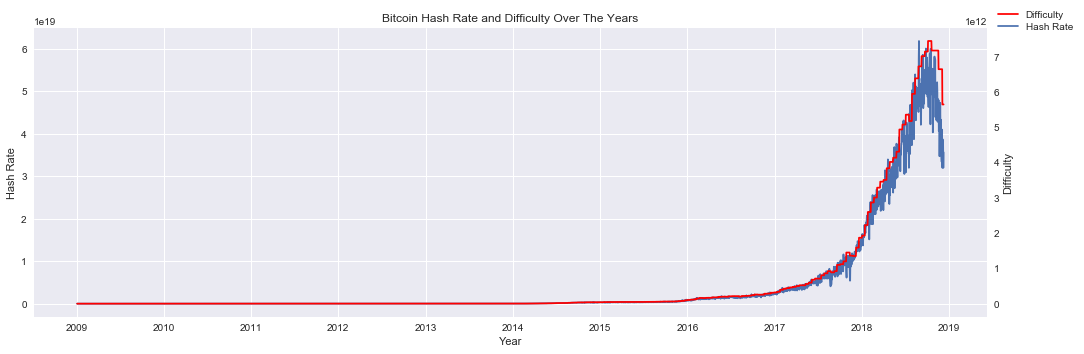

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax.plot(bitcoin_HD['DateTime'], bitcoin_HD['Hash Rate'])
ax.set_xlabel("Year")
ax.set_ylabel("Hash Rate")
ax.set_title("Bitcoin Hash Rate and Difficulty Over The Years")
ax.legend(['Hash Rate'], bbox_to_anchor=(1.1, 1.05))

ax2 = ax.twinx()

ax2.plot(bitcoin_HD['DateTime'], bitcoin_HD['Difficulty'], color='red')
ax2.set_xlabel("Year")
ax2.set_ylabel("Difficulty")
ax2.legend(['Difficulty'], bbox_to_anchor=(1.09, 1.09))
ax2.grid()

plt.tight_layout()
plt.show()

In [19]:
BTC_Price.head()

,Kraken,Coinbase,Bitstamp,Bitfinex,Average
Date,,,,,
2018-11-15,5436.0,5464.32,5462.34,5683.10,5511.4400
2018-11-14,5600.9,5605.46,5595.91,5922.40,5681.1675
2018-11-13,6260.0,6259.35,6260.91,6459.07,6309.8325
2018-11-12,6327.3,6327.86,6318.00,6446.90,6355.0150
2018-11-11,6358.2,6357.60,6357.54,6447.90,6380.3100


In [20]:
bitcoin_HD[bitcoin_HD['Difficulty'] == bitcoin_HD['Difficulty'].max()].head(1)

,DateTime,Hash Rate,Difficulty
3556,2018-10-04,5.558828e+19,7.450000e+12


In [21]:
bitcoin_HD[bitcoin_HD['Hash Rate'] == bitcoin_HD['Hash Rate'].max()]

,DateTime,Hash Rate,Difficulty
3518,2018-08-27,6.186626e+19,6.730000e+12


In the graph above, with accordance to the rules of the Bitcoin network, we can see that the hash rate and the difficulty go along with each other in a general trend. Reasonably, the Hash Rate will lead the direction of the Difficulty level. This speaks for itself in their different peaks as well. While the Hash Rate level peaked in August of 2018, it took the Difficulty Level two months to adjust accordingly and limit the number of Bitcoin mined. 

One point to note about the graph is the decreasing number of Hash Rate and Difficulty level in recent time instead of the beginning of 2018, when the price of Bitcoin dramtically dropped from $19,351. This is a sign that miners might be moving out of the Bitcoin network to either mine at another network because it's more profitable or because they are shutting down due to the decreasing revenue that won't allow them to cover the cost. Thus to find a reasonable explanation, we have decided to turn towards the revenue that the miners receive from their mining.

### Bitcoin Block Rewards 

Miners nowadays have to employ specialized mining chips in order to mine Bitcoin due to the rising Difficulty Level. Thus in order, to provide these miners enough incentives and sufficient funds, the creator/group of creator - Satoshi Nakamoto have decided to program "Block Rewards" or bitcoin rewards each time a miner have been able to create a block within the Bitcoin network. In other words, each time a miner / or a group of miners have been able to create a block within the network, the indivial or the group will receive a designated amount of Bitcoin as rewards for their work. The Block Rewards are given every 10 minutes and halve at each additional 210,000 blocks. It started at 50 Bitcoin and is currently at 12.5 bitcoins per block.   

In [22]:
reformatTime(block_reward_per_day)

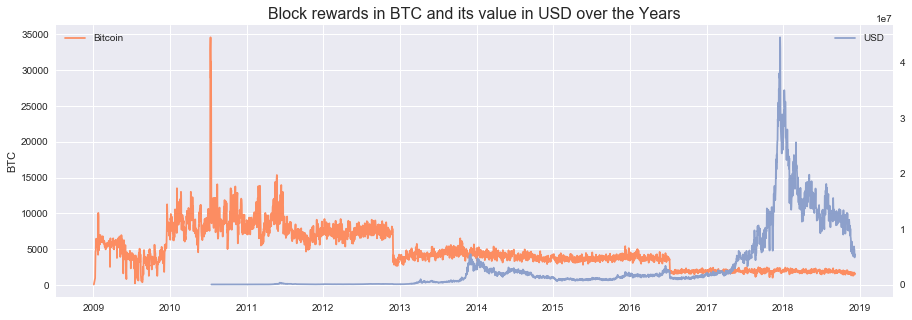

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax.plot(block_reward_per_day['DateTime'],
    block_reward_per_day['BTC'],
    color=palette(1),
    label="Bitcoin")
ax.set_ylabel("BTC")
ax.set_title(
    "Block rewards in BTC and its value in USD over the Years", fontsize=16)
ax.legend(["Bitcoin"], loc=2)

ax2 = ax.twinx()

ax2.plot(
    block_reward_per_day['DateTime'],
    block_reward_per_day['USD'],
    color=palette(2),
    label="USD")
ax2.set_xlabel("Year")
ax2.legend(['USD'], loc=0)
ax2.grid()

plt.show()

From the graph, we can see that the amount of Bitcoin and their values being rewarded to miners are different from each other. This is reasonable according to the price of Bitcoin over the years and the programmed amount of rewards that miners would receive. Thus, despite a low earnings of 12.5 Bitcoins per block since 2016, the Bitcoins value in US Dollars have provided the miners a high revenue especially in the end of 2017. Since there aren't any cost data at the moment on bitcoin miners due to the many factors that come into it, we can observe that this point that in recent times, Bitcoin miners profits have been decreasing with the drop in price. Another source of revenue that miners receive is the fees of transactions that users of the Bitcoins network incur each time a transaction is conducted between each other.

### Bitcoin Transactions and their Fees 

Aside from the block rewards that miners receive, they are also provided with transaction fees as part of the incentives to maintain the Bitcoin network. In fact, this will be the miners main source of revenue once the Bitcoin supply has reached its limit. 

In [24]:
reformatTime(fees_per_day)
reformatTime(transaction_per_day)

bitcoin_FT = pd.merge(fees_per_day, transaction_per_day)

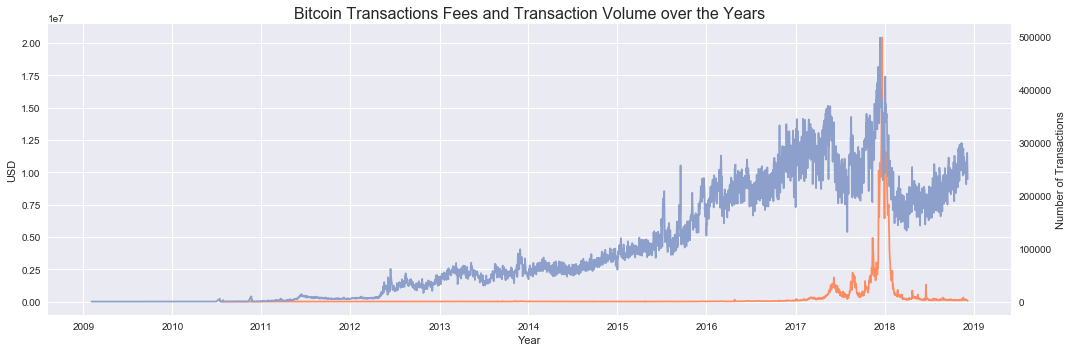

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax.plot(bitcoin_FT["DateTime"], bitcoin_FT['USD'], color=palette(1))
ax.set_xlabel("Year")
ax.set_ylabel('USD')
ax.set_title("Bitcoin Transactions Fees and Transaction Volume over the Years", fontsize=16)

ax2 = ax.twinx()

ax2.plot(bitcoin_FT["DateTime"], bitcoin_FT['Total Per Day'], color=palette(2))
ax2.set_xlabel('Year')
ax2.set_ylabel("Number of Transactions")
ax2.grid()

plt.tight_layout()
plt.show()

In [26]:
bitcoin_FT[bitcoin_FT['USD'] == bitcoin_FT['USD'].max()]

,DateTime,USD,BTC,Segwit,Non-Segwit,Total Per Day,% Segwit
2653,2017-12-22,2.042737e+07,1495.748916,38546,341466,380012,10.143364


Similar, to the price graphs and block rewards, the fees of transactions that miners receive peaked at around December of 2017 at $20,427.370. Yet, different from other graphs, the amount of fees that miners receive from transactions dramatically decreased in the first quarter of 2018 and went near the amount of fees that miners would receive in years before Bitcoin gained traction

## Conclusion

We definitely see that although Bitcoin prices were not as they once used to, there still seems to be a generally positive sentiment about Bitcoin. However, Bitcoin's volatile price has various effects, one of the most significant effect it has is on the miners and nodes of the network. We noted earlier a drop in the hash rate of the Bitcoin network. Coupled with the observation that the incentives for miners to remain in the network has been decreasing with the drop in block rewards and transaction fees, there does seem to be indication that miners are in fact leaving the network. Bitcoin's price volatilty has definitely outweighed its benefits with its use of Blockchain - the overall impact has been negative is deteriorating the health of the network as a whole. The world just may not yet be ready for an unregulated currency.